# Context
    • Imagine you are working as a Data Scientist for an Online Wine Shop named “The Wine Land” 
    • As the name suggests, the online store specializes in selling different varieties of wines.
    • The online store receives a decent amount of traffic and reviews from its users.
    • Leverage the “reviews” data and draw actionable insights from it.

# What is Expected?
    • Build a predictive model for predicting the wine “variety”. Provide the output along with all features to a CSV file. Both Training & test data is provided here
    • Submit the source code used for building models in a zip or share the link to the GitHub repository.
    • Also submit a short summary: Model used, features extracted, Model accuracy in train. Along with some visualization of data and top 5 actionable Insights from the Data.
    • .

## The Data Description is as follows:
    • user_name - user_name of the reviewer
    • country -The country that the wine is from.
    • review_title - The title of the wine review, which often contains the vintage.
    • review_description - A verbose review of the wine.
    • designation - The vineyard within the winery where the grapes that made the wine are from.
    • points - ratings given by the user. The ratings are between 0 -100.
    • price - The cost for a bottle of the wine
    • province - The province or state that the wine is from.
    • region_1 - The wine-growing area in a province or state (ie Napa).
    • region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
    • winery - The winery that made the wine
    • variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment

#  Load Libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

# Load Train Data

In [3]:
train_raw_df = pd.read_csv('Knight ML Assignment/Data/train.csv')
train_raw_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
train_raw_df.shape

(82657, 12)

# Load New Test Data

In [5]:
test_raw_df = pd.read_csv('Knight ML Assignment/Data/test.csv')
test_raw_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


# Remove Duplicate Rows

In [6]:
train_raw_df.drop_duplicates(keep = "first", inplace = True, ignore_index=True)

In [7]:
train_raw_df.shape

(77641, 12)

# Remove Unwanted Columns

* The Features 'user_name', 'designation', 'region_1', 'region_2' have lots of missing values and also these features are not much affected to predict target variable i.e, 'variety' of grapes.

In [8]:
train_raw_df.drop(['user_name', 'designation', 'region_1', 'region_2'], axis=1, inplace=True)

### Remove Unwanted Columns From New Test Data

In [9]:
test_raw_df.drop(['user_name', 'designation', 'region_1', 'region_2'], axis=1, inplace=True)

# Handle NULL values

In [10]:
def count_null(df):
    
    print('*Column wise Count Of Null Values*\n')
    for i in range(len(df.columns)):
        
        print(df.columns[i], ":", len(df[df[df.columns[i]].isnull()==True]))
    

In [11]:
count_null(train_raw_df)

*Column wise Count Of Null Values*

country : 33
review_title : 0
review_description : 0
points : 0
price : 5285
province : 33
winery : 0
variety : 0


In [12]:
count_null(test_raw_df)

*Column wise Count Of Null Values*

country : 4
review_title : 0
review_description : 0
points : 0
price : 1394
province : 4
winery : 0


## Drop NaN values

* The feature 'province' have 33 NaN values. Here we can't fill the data average data. Because 'province' depends on 'country'.

### Train Data

In [13]:
train_raw_df.dropna(subset=['province'], inplace=True)
train_raw_df.reset_index(drop=True, inplace=True)

In [14]:
count_null(train_raw_df)

*Column wise Count Of Null Values*

country : 0
review_title : 0
review_description : 0
points : 0
price : 5281
province : 0
winery : 0
variety : 0


### Test New Data

In [15]:
test_raw_df.dropna(subset=['province'], inplace=True)
test_raw_df.reset_index(drop=True, inplace=True)

In [16]:
count_null(test_raw_df)

*Column wise Count Of Null Values*

country : 0
review_title : 0
review_description : 0
points : 0
price : 1394
province : 0
winery : 0


## Fill NAN Values or Imputation

* The feature 'price' have 5281 NaN values.
* So I fill the most frequent prices of apropreate countries instade of NaN values in 'price'. 

### Train Data

In [17]:
price_missed_countries = train_raw_df[train_raw_df['price'].isnull()==True]['country'].value_counts().keys()

for country in price_missed_countries:
    indexes = train_raw_df[(train_raw_df['price'].isnull()==True) & (train_raw_df['country']==country)]['price'].index
    for i in indexes:
        train_raw_df.loc[i, 'price'] = train_raw_df[train_raw_df['country'] == country]['price'].mode()[0]
        

In [18]:
count_null(train_raw_df)

*Column wise Count Of Null Values*

country : 0
review_title : 0
review_description : 0
points : 0
price : 0
province : 0
winery : 0
variety : 0


### Test New Data

In [19]:
price_missed_countries = test_raw_df[test_raw_df['price'].isnull()==True]['country'].value_counts().keys()

for country in price_missed_countries:
    indexes = test_raw_df[(test_raw_df['price'].isnull()==True) & (test_raw_df['country']==country)]['price'].index
    for i in indexes:
        test_raw_df.loc[i, 'price'] = test_raw_df[test_raw_df['country'] == country]['price'].mode()[0]
        

In [20]:
count_null(test_raw_df)

*Column wise Count Of Null Values*

country : 0
review_title : 0
review_description : 0
points : 0
price : 0
province : 0
winery : 0


# Seperate Dependent (X) Variables and Independent (y) Variables of Train Data

In [21]:
train_df = train_raw_df.copy()
print('Train Data Shape', train_df.shape)

Train Data Shape (77608, 8)


In [22]:
X = train_df.drop(['variety'], axis=1)
y = train_df['variety']

In [23]:
print('X shape', X.shape)
print('y shape', y.shape)

X shape (77608, 7)
y shape (77608,)


### New Test Data

In [24]:
test_df = test_raw_df.copy()
print('New Data Shape', test_df.shape)

New Data Shape (20661, 7)


# Visualization Of Target Variable

In [25]:
target_classes = y.value_counts()

print('Total Number Of Prediction Classes : ', len(target_classes))
print('-'*50)
print('\nCount of each class :\n'+'-'*50,'\n', target_classes)

Total Number Of Prediction Classes :  28
--------------------------------------------------

Count of each class :
-------------------------------------------------- 
 Pinot Noir                    9963
Chardonnay                    8833
Cabernet Sauvignon            7153
Red Blend                     6721
Bordeaux-style Red Blend      5206
Riesling                      3876
Sauvignon Blanc               3748
Syrah                         3117
Rosé                          2606
Merlot                        2336
Nebbiolo                      2112
Zinfandel                     2091
Sangiovese                    2006
Malbec                        1985
Portuguese Red                1843
White Blend                   1774
Sparkling Blend               1621
Tempranillo                   1364
Rhône-style Red Blend         1102
Champagne Blend               1075
Pinot Gris                    1062
Cabernet Franc                1027
Grüner Veltliner               976
Portuguese White           

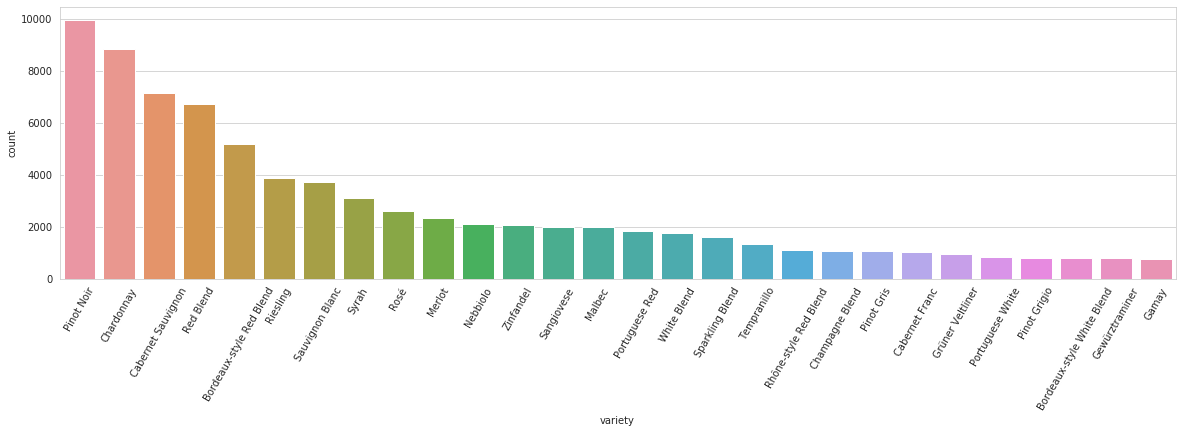

In [26]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=60)
sns.countplot(x='variety', data=train_df, order = target_classes.index)
plt.show()

# Conavert the Target Vriable Categorical to Numeric

In [27]:
target_dict = {}

i = 1
for cls in target_classes.keys():

    target_dict[cls] = i
    
    i += 1

print(target_dict)

{'Pinot Noir': 1, 'Chardonnay': 2, 'Cabernet Sauvignon': 3, 'Red Blend': 4, 'Bordeaux-style Red Blend': 5, 'Riesling': 6, 'Sauvignon Blanc': 7, 'Syrah': 8, 'Rosé': 9, 'Merlot': 10, 'Nebbiolo': 11, 'Zinfandel': 12, 'Sangiovese': 13, 'Malbec': 14, 'Portuguese Red': 15, 'White Blend': 16, 'Sparkling Blend': 17, 'Tempranillo': 18, 'Rhône-style Red Blend': 19, 'Champagne Blend': 20, 'Pinot Gris': 21, 'Cabernet Franc': 22, 'Grüner Veltliner': 23, 'Portuguese White': 24, 'Pinot Grigio': 25, 'Bordeaux-style White Blend': 26, 'Gewürztraminer': 27, 'Gamay': 28}


In [28]:
y = y.map(target_dict)
y.head()

0     2
1     4
2    11
3    26
4    14
Name: variety, dtype: int64

# Visualization Of Independent Variable

In [29]:
X.head()

,country,review_title,review_description,points,price,province,winery
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,Andrew Peace
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,North by Northwest
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Renato Ratti
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Domaine l'Ancienne Cure
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Château du Cèdre


## Replace space with underscore

In [30]:
X['country'].replace(' ', '_',regex=True, inplace=True)

# Load Machine Learning Libreries

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Split Train data into Train, CrossValidation and Test

In [32]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=888, stratify=y)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=888, stratify=y_train)

# # Prepare Data

# Declare Set1 for Bag Of Words & Set2 for TF-IDF

In [33]:
features_names_set1 = []   #set1 for BoW
features_names_set2 = []   #set2 for TfIdf

# 1. One Hot Encoding
1. country

In [35]:
# One hot Encoding for country
print("Before Vectorizations")
print('Train Shape : X', X_train.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test.shape, ', y', y_test.shape)

print("="*100)

# X_train_country = pd.get_dummies(X_train['country'], drop_first=True)
# X_cv_country = pd.get_dummies(X_train['country'], drop_first=True)
# X_test_country = pd.get_dummies(X_train['country'], drop_first=True)

vectorizer = CountVectorizer(max_features=5000)
vectorizer.fit(X_train['country'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_country = vectorizer.transform(X_train['country'].values)
X_cv_country = vectorizer.transform(X_cv['country'].values)
X_test_country = vectorizer.transform(X_test['country'].values)


print("After Vectorizations")
print('Train Shape : X', X_train_country.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_country.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_country.shape, ', y', y_test.shape)

#print(X_test_school_state.toarray()[0])
print("="*100)
print(vectorizer.get_feature_names())

for i in vectorizer.get_feature_names():
    features_names_set1.append(i)
    features_names_set2.append(i)
    
    
print('\nfeatures_names_set1 :', len(features_names_set1))
print('features_names_set2 :', len(features_names_set2))

Before Vectorizations
Train Shape : X (34837, 7) , y (34837,)
CV Shape    : X (17160, 7) , y (17160,)
Test Shape  : X (25611, 7) , y (25611,)
After Vectorizations
Train Shape : X (34837, 38) , y (34837,)
CV Shape    : X (17160, 38) , y (17160,)
Test Shape  : X (25611, 38) , y (25611,)
['argentina', 'australia', 'austria', 'brazil', 'bulgaria', 'canada', 'chile', 'croatia', 'cyprus', 'czech_republic', 'england', 'france', 'georgia', 'germany', 'greece', 'hungary', 'india', 'israel', 'italy', 'lebanon', 'luxembourg', 'macedonia', 'mexico', 'moldova', 'morocco', 'new_zealand', 'peru', 'portugal', 'romania', 'serbia', 'slovenia', 'south_africa', 'spain', 'switzerland', 'turkey', 'ukraine', 'uruguay', 'us']

features_names_set1 : 38
features_names_set2 : 38


# 2. Label Encoding
1. province
2. winery

In [36]:
# Source : https://stackoverflow.com/a/56876351
# Custom Class For LabelEncoder
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [37]:
# Label Encoding for province

label_encoder = LabelEncoderExt()
label_encoder.fit(X_train['province']) # fit has to happen only on train data

# print(X_train['points'].shape)
# o/p : (34837,)  need to reshape
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature    (column)
# array.reshape(1, -1)  if it contains a single sample.    (row)

# we use the LabelEncoder to convert the categorical data to numerical
X_train_province = label_encoder.transform(X_train['province']).reshape(-1,1)
X_cv_province = label_encoder.transform(X_cv['province']).reshape(-1,1)
X_test_province = label_encoder.transform(X_test['province']).reshape(-1,1)


print("After Label Encodeing")
print('Train Shape : X', X_train_province.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_province.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_province.shape, ', y', y_test.shape)

print("="*100)

features_names_set1.append(1)
features_names_set2.append(1)
    
    
print('\nfeatures_names_set1 :', len(features_names_set1))
print('features_names_set2 :', len(features_names_set2))

After Label Encodeing
Train Shape : X (34837, 1) , y (34837,)
CV Shape    : X (17160, 1) , y (17160,)
Test Shape  : X (25611, 1) , y (25611,)

features_names_set1 : 39
features_names_set2 : 39


In [38]:
# Label Encoding for winery

label_encoder = LabelEncoderExt()
label_encoder.fit(X_train['winery']) # fit has to happen only on train data

# print(X_train['points'].shape)
# o/p : (34837,)  need to reshape
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature    (column)
# array.reshape(1, -1)  if it contains a single sample.    (row)

# we use the LabelEncoder to convert the categorical data to numerical
X_train_winery = label_encoder.transform(X_train['winery']).reshape(-1,1)
X_cv_winery = label_encoder.transform(X_cv['winery']).reshape(-1,1)
X_test_winery = label_encoder.transform(X_test['winery']).reshape(-1,1)


print("After Label Encodeing")
print('Train Shape : X', X_train_winery.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_winery.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_winery.shape, ', y', y_test.shape)

print("="*100)

features_names_set1.append(1)
features_names_set2.append(1)
    
    
print('\nfeatures_names_set1 :', len(features_names_set1))
print('features_names_set2 :', len(features_names_set2))

After Label Encodeing
Train Shape : X (34837, 1) , y (34837,)
CV Shape    : X (17160, 1) , y (17160,)
Test Shape  : X (25611, 1) , y (25611,)

features_names_set1 : 40
features_names_set2 : 40


# 3. Encoding Numerical Features

1. points
2. price

In [39]:
# Normalize points
normalizer = Normalizer()

# print(X_train['points'].shape)
# o/p : (34837,)  need to reshape
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature    (column)
# array.reshape(1, -1)  if it contains a single sample.    (row)

normalizer.fit(X_train['points'].values.reshape(-1,1))

X_train_points_norm = normalizer.transform(X_train['points'].values.reshape(-1,1))
X_cv_points_norm = normalizer.transform(X_cv['points'].values.reshape(-1,1))
X_test_points_norm = normalizer.transform(X_test['points'].values.reshape(-1,1))


print("After Label Encodeing")
print('Train Shape : X', X_train_points_norm.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_points_norm.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_points_norm.shape, ', y', y_test.shape)

print("="*100)

features_names_set1.append(1)
features_names_set2.append(1)
    
    
print('\nfeatures_names_set1 :', len(features_names_set1))
print('features_names_set2 :', len(features_names_set2))


After Label Encodeing
Train Shape : X (34837, 1) , y (34837,)
CV Shape    : X (17160, 1) , y (17160,)
Test Shape  : X (25611, 1) , y (25611,)

features_names_set1 : 41
features_names_set2 : 41


In [40]:
# Normalize price
normalizer = Normalizer()

# print(X_train['points'].shape)
# o/p : (34837,)  need to reshape
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature    (column)
# array.reshape(1, -1)  if it contains a single sample.    (row)

normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))


print("After Label Encodeing")
print('Train Shape : X', X_train_price_norm.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_price_norm.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_price_norm.shape, ', y', y_test.shape)

print("="*100)

features_names_set1.append(1)
features_names_set2.append(1)
    
    
print('\nfeatures_names_set1 :', len(features_names_set1))
print('features_names_set2 :', len(features_names_set2))


After Label Encodeing
Train Shape : X (34837, 1) , y (34837,)
CV Shape    : X (17160, 1) , y (17160,)
Test Shape  : X (25611, 1) , y (25611,)

features_names_set1 : 42
features_names_set2 : 42


# 4. BoW

1. review_title
2. review_description

In [41]:
# Bag of Word for review_title

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['review_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_review_title_bow = vectorizer.transform(X_train['review_title'].values)
X_cv_review_title_bow = vectorizer.transform(X_cv['review_title'].values)
X_test_review_title_bow = vectorizer.transform(X_test['review_title'].values)



print("After Vectorizations")
print('Train Shape : X', X_train_review_title_bow.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_review_title_bow.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_review_title_bow.shape, ', y', y_test.shape)

print("="*100)

for i in vectorizer.get_feature_names():
    features_names_set1.append(i)

    
print('\nfeatures_names_set1 :', len(features_names_set1))

After Vectorizations
Train Shape : X (34837, 5000) , y (34837,)
CV Shape    : X (17160, 5000) , y (17160,)
Test Shape  : X (25611, 5000) , y (25611,)

features_names_set1 : 5042


In [42]:
# Bag of Word for review_description

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['review_description'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_review_description_bow = vectorizer.transform(X_train['review_description'].values)
X_cv_review_description_bow = vectorizer.transform(X_cv['review_description'].values)
X_test_review_description_bow = vectorizer.transform(X_test['review_description'].values)



print("After Vectorizations")
print('Train Shape : X', X_train_review_description_bow.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_review_description_bow.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_review_description_bow.shape, ', y', y_test.shape)

print("="*100)

for i in vectorizer.get_feature_names():
    features_names_set1.append(i)

    
print('\nfeatures_names_set1 :', len(features_names_set1))

After Vectorizations
Train Shape : X (34837, 5000) , y (34837,)
CV Shape    : X (17160, 5000) , y (17160,)
Test Shape  : X (25611, 5000) , y (25611,)

features_names_set1 : 10042


# 4. TF-IDF

1. review_title
2. review_description

In [43]:
# TF-IDF of review_title

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)# its a countvectors used for convert text to vectors
vectorizer.fit(X_train['review_title'].values)# that is learned from trainned data

# we use the fitted CountVectorizer to convert the text to vector
X_train_review_title_tf = vectorizer.transform(X_train['review_title'].values)
X_cv_review_title_tf= vectorizer.transform(X_cv['review_title'].values)
X_test_review_title_tf = vectorizer.transform(X_test['review_title'].values)


print("After Vectorizations")
print('Train Shape : X', X_train_review_title_tf.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_review_title_tf.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_review_title_tf.shape, ', y', y_test.shape)

print("="*100)

for i in vectorizer.get_feature_names():
    features_names_set2.append(i)
    
print('\nfeatures_names_set2 :', len(features_names_set2))

After Vectorizations
Train Shape : X (34837, 2352) , y (34837,)
CV Shape    : X (17160, 2352) , y (17160,)
Test Shape  : X (25611, 2352) , y (25611,)

features_names_set2 : 2394


In [44]:
# TF-IDF of review_description

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)# its a countvectors used for convert text to vectors
vectorizer.fit(X_train['review_description'].values)# that is learned from trainned data

# we use the fitted CountVectorizer to convert the text to vector
X_train_review_description_tf = vectorizer.transform(X_train['review_description'].values)
X_cv_review_description_tf= vectorizer.transform(X_cv['review_description'].values)
X_test_review_description_tf = vectorizer.transform(X_test['review_description'].values)


print("After Vectorizations")
print('Train Shape : X', X_train_review_description_tf.shape, ', y', y_train.shape)
print('CV Shape    : X', X_cv_review_description_tf.shape, ', y', y_cv.shape)
print('Test Shape  : X', X_test_review_description_tf.shape, ', y', y_test.shape)

print("="*100)

for i in vectorizer.get_feature_names():
    features_names_set2.append(i)
    
print('\nfeatures_names_set2 :', len(features_names_set2))

After Vectorizations
Train Shape : X (34837, 4861) , y (34837,)
CV Shape    : X (17160, 4861) , y (17160,)
Test Shape  : X (25611, 4861) , y (25611,)

features_names_set2 : 7255


# # Concatinating all the features (Set1)

In [45]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# Train
X_train_set1 = hstack((X_train_country, X_train_province, X_train_winery, X_train_points_norm, 
               X_train_price_norm, X_train_review_title_bow, X_train_review_description_bow)).tocsr()

# Cross-Validation
X_cv_set1 = hstack((X_cv_country, X_cv_province, X_cv_winery, X_cv_points_norm, X_cv_price_norm, 
               X_cv_review_title_bow, X_cv_review_description_bow)).tocsr()

# Test
X_test_set1 = hstack((X_test_country, X_test_province, X_test_winery, X_test_points_norm, 
               X_test_price_norm, X_test_review_title_bow, X_test_review_description_bow)).tocsr()
#
#

#
#
print("Final Data matrix")
print(X_train_set1.shape, y_train.shape)
print(X_cv_set1.shape, y_cv.shape)
print(X_test_set1.shape, y_test.shape)
print("="*100)

Final Data matrix
(34837, 10042) (34837,)
(17160, 10042) (17160,)
(25611, 10042) (25611,)


# # Concatinating all the features (Set2)

In [46]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# Train
X_train_set2 = hstack((X_train_country, X_train_province, X_train_winery, X_train_points_norm, 
               X_train_price_norm, X_train_review_title_tf, X_train_review_description_tf)).tocsr()

# Cross-Validation
X_cv_set2 = hstack((X_cv_country, X_cv_province, X_cv_winery, X_cv_points_norm, X_cv_price_norm, 
               X_cv_review_title_tf, X_cv_review_description_tf)).tocsr()

# Test
X_test_set2 = hstack((X_test_country, X_test_province, X_test_winery, X_test_points_norm, 
               X_test_price_norm, X_test_review_title_tf, X_test_review_description_tf)).tocsr()
#
#

#
#
#
print("Final Data matrix")
print(X_train_set2.shape, y_train.shape)
print(X_cv_set2.shape, y_cv.shape)
print(X_test_set2.shape, y_test.shape)
print("="*100)

Final Data matrix
(34837, 7255) (34837,)
(17160, 7255) (17160,)
(25611, 7255) (25611,)


# Applying Model (XGBClassifier) on Train Data

* I use the XGBClassifier based on type of Data

# Using Bag Of Word (Set1)

## Find Best Hyperparameters Using RandomizedSearchCV

* In XGBClassifier, Hyperparameters are 'n_estimators' and 'learning_rate'

In [123]:
gbdt = XGBClassifier(objective='multi:softmax')

grid_params = {'n_estimators': [10, 50, 100, 150, 200], 'learning_rate':[0.0001, 0.001, 0.01, 0.1]}
 
rs_cv_set1 = RandomizedSearchCV(gbdt,grid_params ,cv=3, scoring='roc_auc_ovr', n_jobs=-1)
rs_cv_set1.fit(X_train_set1, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=N

In [121]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
# joblib.dump(rs_cv_set1, 'rs_cv_set1.pkl') 
  
# # Load the model from the file 
# rs_cv_set1 = joblib.load('rs_cv_set1.pkl')

['rs_cv.pkl']

## The Best Hyperparameters

In [130]:
print('Best score: ', rs_cv_set1.best_score_)
print('k value with best score: ', rs_cv_set1.best_params_)

Best score: 0.9994549063487673
k value with best score: {'n_estimators': 100, 'learning_rate': 0.1}


# Use Best Hyperparameter and Build Model

In [47]:
xgb_set1 = XGBClassifier(objective='multi:softmax', n_estimators=100, learning_rate=0.1 )

xgb_set1.fit(X_train_set1, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [49]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(xgb_set1, 'xgb_model_set1.pkl') 
  
# # Load the model from the file 
# xgb_set1 = joblib.load('xgb_model_set1.pkl')

['xgb_model_set1.pkl']

# Predict Cross Validation Data

In [50]:
y_cv_set1_pred = xgb_set1.predict(X_cv_set1)

# Confusion Matrix For Cross Validation Data

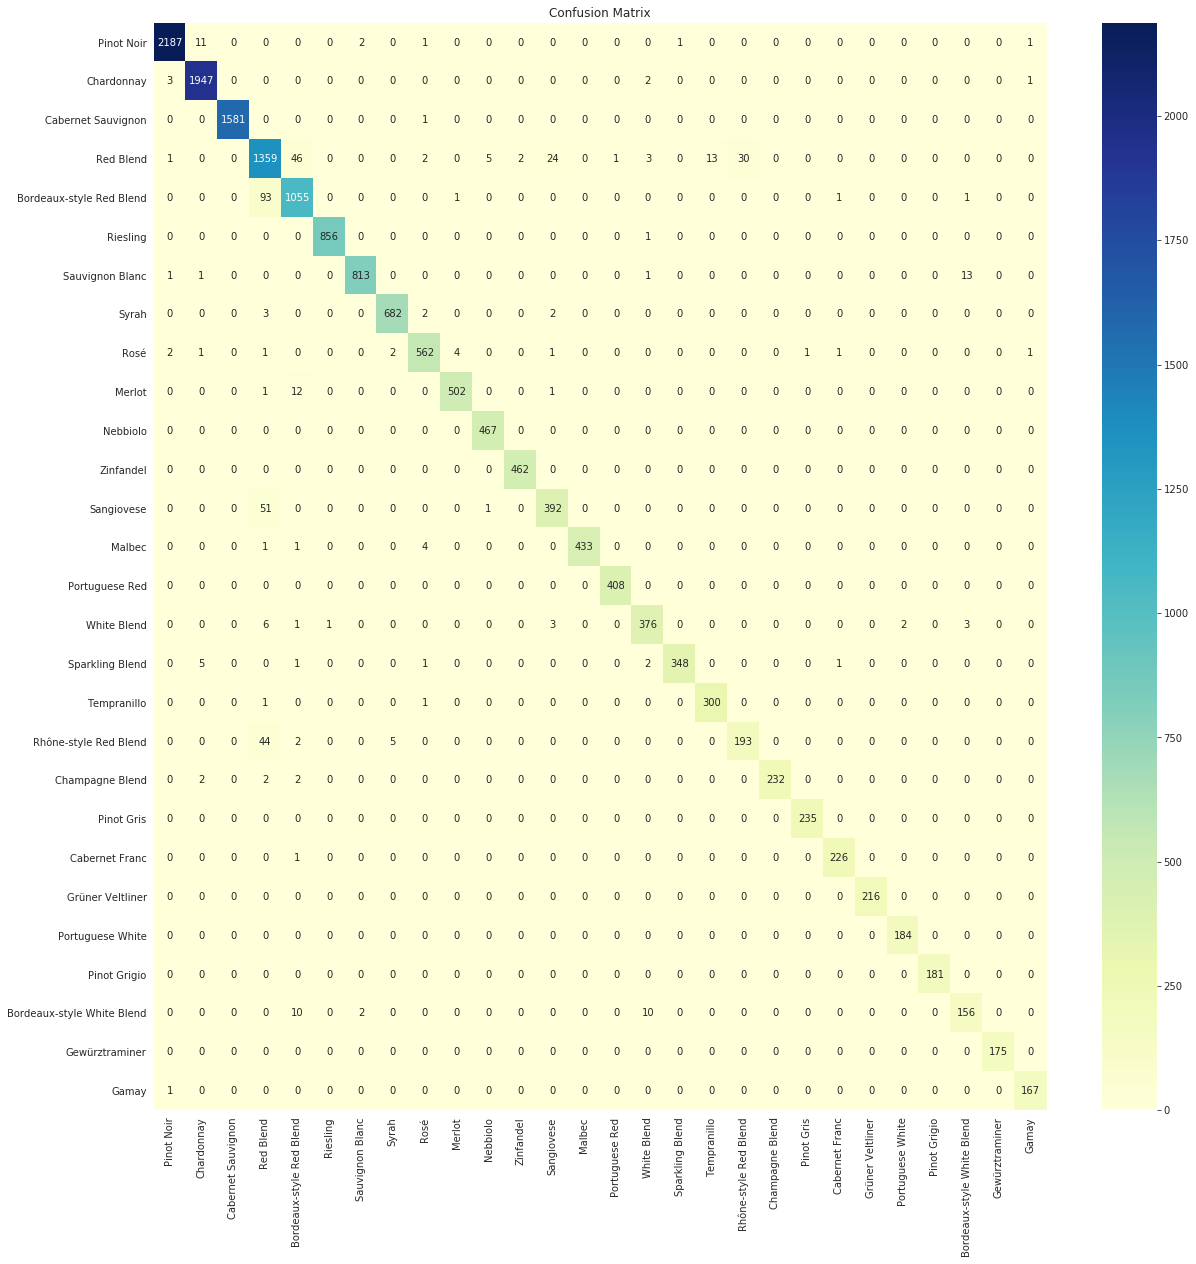

In [51]:
CM = confusion_matrix(y_cv, y_cv_set1_pred)

plt.figure(figsize=(20, 20))
ax = plt.axes()
sns.heatmap(CM, annot=True, xticklabels=list(target_classes.keys()), yticklabels=list(target_classes.keys()), cmap="YlGnBu", fmt='d', ax = ax)
ax.set_title('Confusion Matrix')
plt.show()

# Detail Report For Cross Validation Accuracy

In [52]:
print(classification_report(y_cv, y_cv_set1_pred, target_names=list(target_classes.keys())))

                            precision    recall  f1-score   support

                Pinot Noir       1.00      0.99      0.99      2203
                Chardonnay       0.99      1.00      0.99      1953
        Cabernet Sauvignon       1.00      1.00      1.00      1582
                 Red Blend       0.87      0.91      0.89      1486
  Bordeaux-style Red Blend       0.93      0.92      0.92      1151
                  Riesling       1.00      1.00      1.00       857
           Sauvignon Blanc       1.00      0.98      0.99       829
                     Syrah       0.99      0.99      0.99       689
                      Rosé       0.98      0.98      0.98       576
                    Merlot       0.99      0.97      0.98       516
                  Nebbiolo       0.99      1.00      0.99       467
                 Zinfandel       1.00      1.00      1.00       462
                Sangiovese       0.93      0.88      0.90       444
                    Malbec       1.00      0.99

# Predict Test Data

In [53]:
y_test_set1_pred = xgb_set1.predict(X_test_set1)

# Confusion Matrix For Cross Validation Data

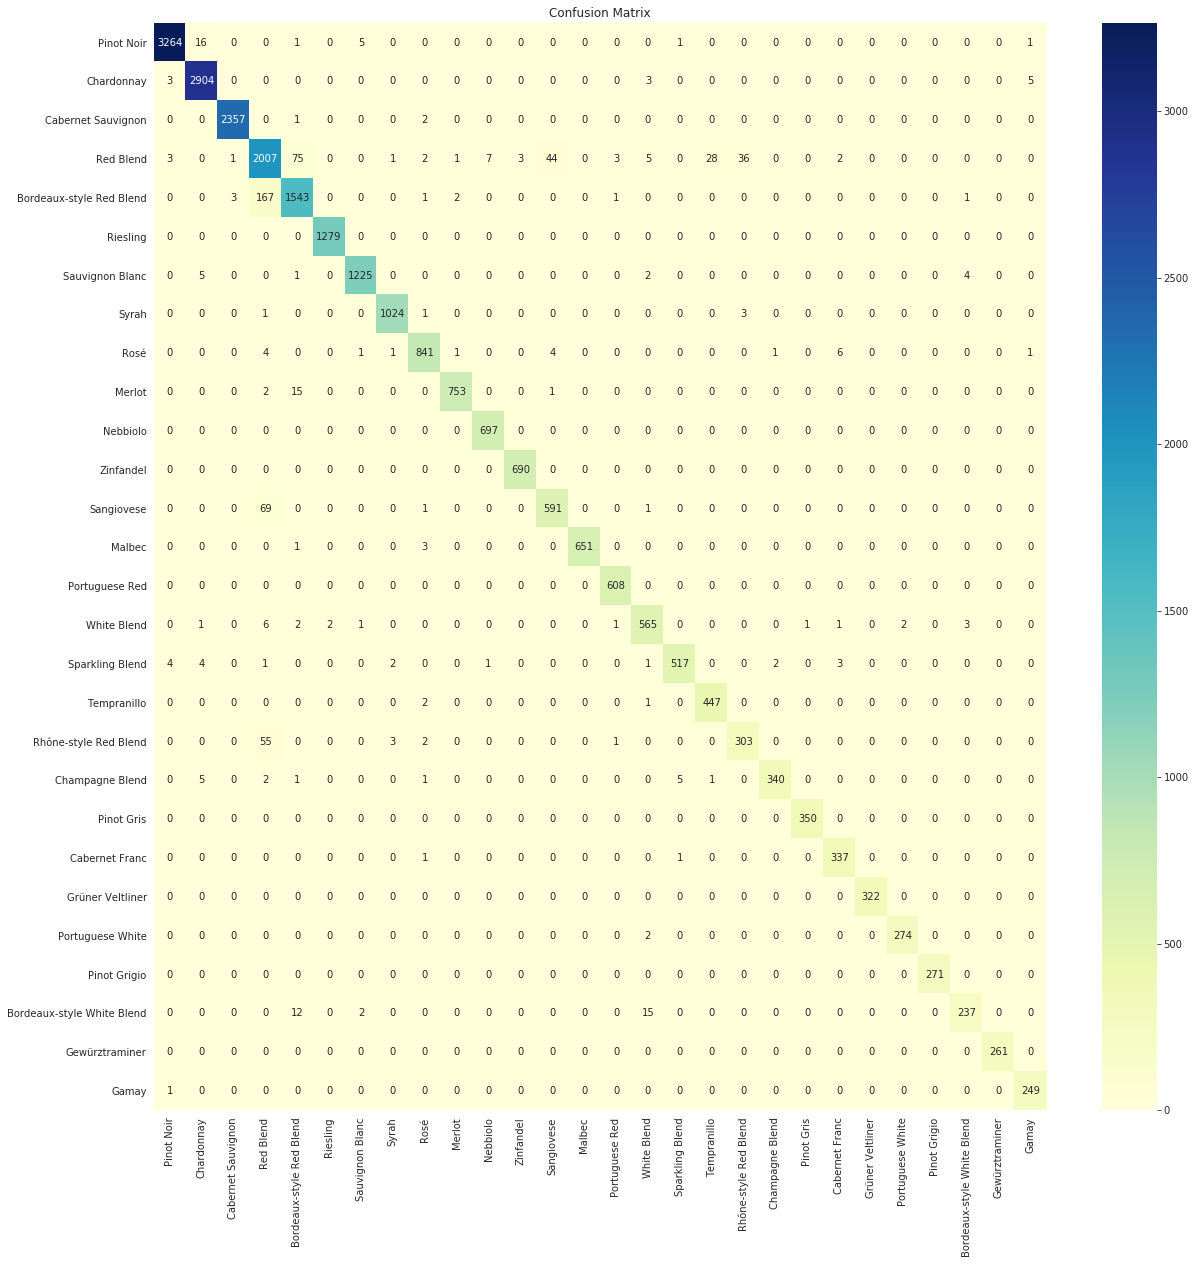

In [54]:
CM = confusion_matrix(y_test, y_test_set1_pred)

plt.figure(figsize=(20, 20))
ax = plt.axes()
sns.heatmap(CM, annot=True, xticklabels=list(target_classes.keys()), yticklabels=list(target_classes.keys()), cmap="YlGnBu", fmt='d', ax = ax)
ax.set_title('Confusion Matrix')
plt.show()

# Detail Report For Test Accuracy

In [55]:
print(classification_report(y_test, y_test_set1_pred, target_names=list(target_classes.keys())))

                            precision    recall  f1-score   support

                Pinot Noir       1.00      0.99      0.99      3288
                Chardonnay       0.99      1.00      0.99      2915
        Cabernet Sauvignon       1.00      1.00      1.00      2360
                 Red Blend       0.87      0.90      0.89      2218
  Bordeaux-style Red Blend       0.93      0.90      0.92      1718
                  Riesling       1.00      1.00      1.00      1279
           Sauvignon Blanc       0.99      0.99      0.99      1237
                     Syrah       0.99      1.00      0.99      1029
                      Rosé       0.98      0.98      0.98       860
                    Merlot       0.99      0.98      0.99       771
                  Nebbiolo       0.99      1.00      0.99       697
                 Zinfandel       1.00      1.00      1.00       690
                Sangiovese       0.92      0.89      0.91       662
                    Malbec       1.00      0.99

# Using TF-IDF (Set2)

## Find Best Hyperparameters Using RandomizedSearchCV

* In XGBClassifier, Hyperparameters are 'n_estimators' and 'learning_rate'

In [125]:
gbdt = XGBClassifier(objective='multi:softmax')

grid_params = {'n_estimators': [10, 50, 100, 150, 200], 'learning_rate':[0.0001, 0.001, 0.01, 0.1]}
 
rs_cv_set2 = RandomizedSearchCV(gbdt, grid_params, cv=3, scoring='roc_auc_ovr', n_jobs=-1)
rs_cv_set2.fit(X_train_set2, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=N

## The Best Hyperparameters

In [127]:
print('Best score: ',rs_cv_set2.best_score_)
print('k value with best score: ',rs_cv_set2.best_params_)

Best score:  0.9993549068686683
k value with best score:  {'n_estimators': 150, 'learning_rate': 0.1}


In [128]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(rs_cv_set2, 'rs_cv_set2.pkl') 
  
# # Load the model from the file 
# rs_cv_set2 = joblib.load('rs_cv_set2.pkl')

['rs_cv_set2.pkl']

# Use Best Hyperparameter and Build Model

In [56]:
xgb_set2 = XGBClassifier(objective='multi:softmax', n_estimators=150, learning_rate=0.1 )

xgb_set2.fit(X_train_set2, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [57]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(xgb_set2, 'xgb_model_set2.pkl') 
  
# # Load the model from the file 
# xgb_set2 = joblib.load('xgb_model_set2.pkl')

['xgb_model_set2.pkl']

# Predict Cross Validation Data

In [58]:
y_cv_set2_pred = xgb_set2.predict(X_cv_set2)

# Confusion Matrix For Cross Validation Data

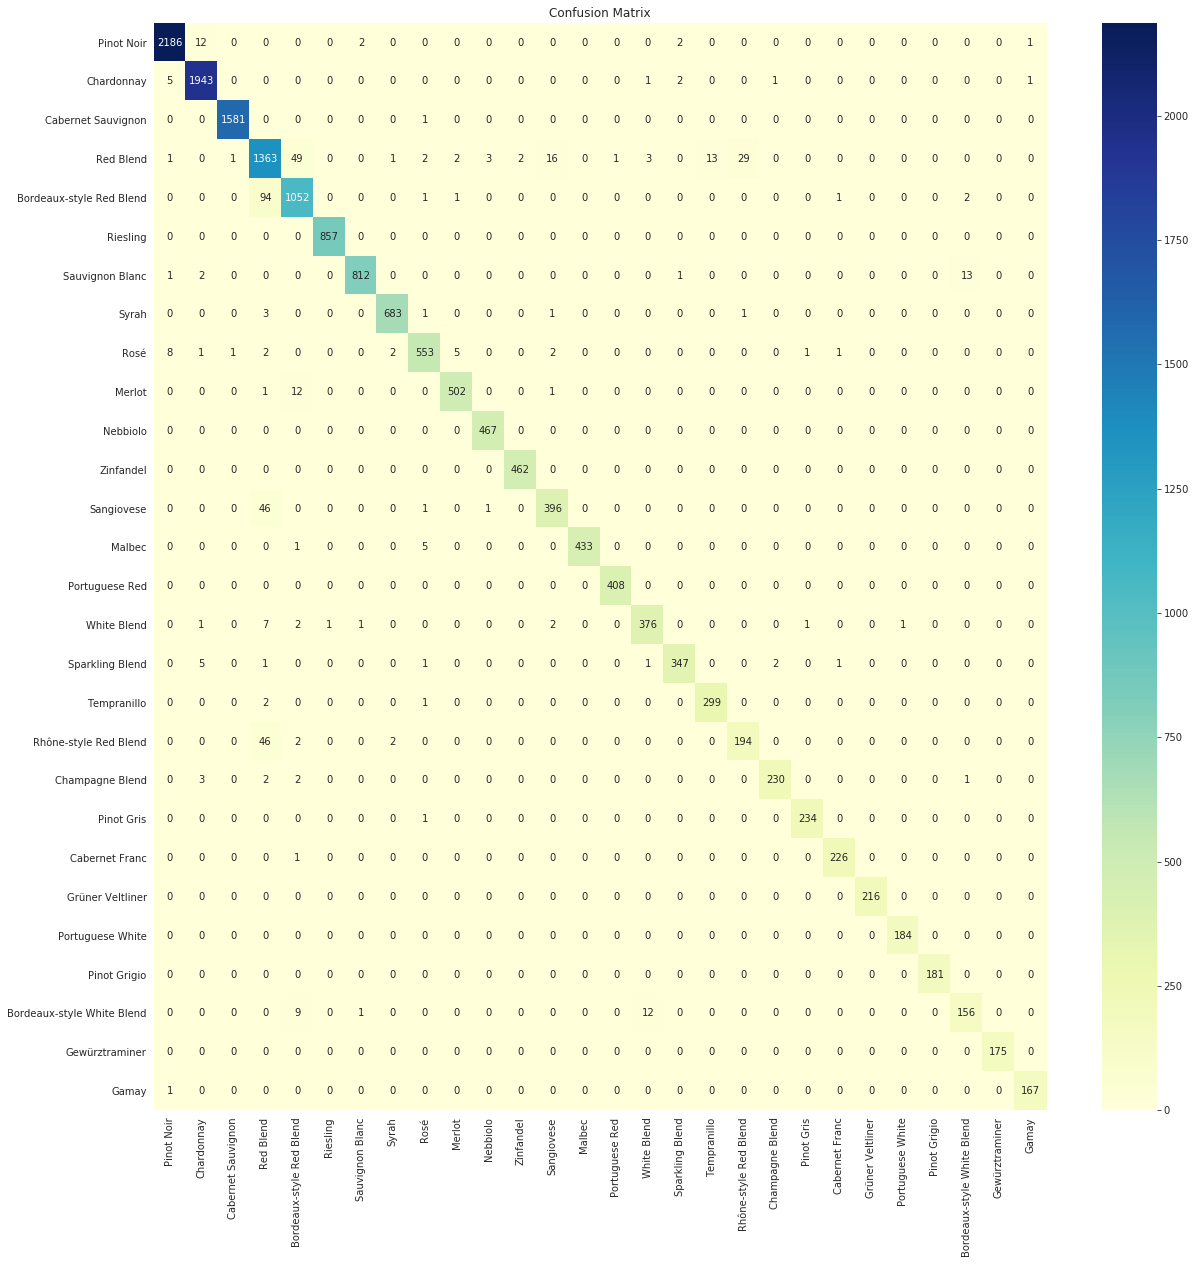

In [59]:
CM = confusion_matrix(y_cv, y_cv_set2_pred)

plt.figure(figsize=(20, 20))
ax = plt.axes()
sns.heatmap(CM, annot=True, xticklabels=list(target_classes.keys()), yticklabels=list(target_classes.keys()), cmap="YlGnBu", fmt='d', ax = ax)
ax.set_title('Confusion Matrix')
plt.show()

# Detail Report For Cross Validation Accuracy

In [60]:
print(classification_report(y_cv, y_cv_set2_pred, target_names=list(target_classes.keys())))

                            precision    recall  f1-score   support

                Pinot Noir       0.99      0.99      0.99      2203
                Chardonnay       0.99      0.99      0.99      1953
        Cabernet Sauvignon       1.00      1.00      1.00      1582
                 Red Blend       0.87      0.92      0.89      1486
  Bordeaux-style Red Blend       0.93      0.91      0.92      1151
                  Riesling       1.00      1.00      1.00       857
           Sauvignon Blanc       1.00      0.98      0.99       829
                     Syrah       0.99      0.99      0.99       689
                      Rosé       0.98      0.96      0.97       576
                    Merlot       0.98      0.97      0.98       516
                  Nebbiolo       0.99      1.00      1.00       467
                 Zinfandel       1.00      1.00      1.00       462
                Sangiovese       0.95      0.89      0.92       444
                    Malbec       1.00      0.99

# Predict Test Data

In [61]:
y_test_set2_pred = xgb_set2.predict(X_test_set2)

# Confusion Matrix For Test Data

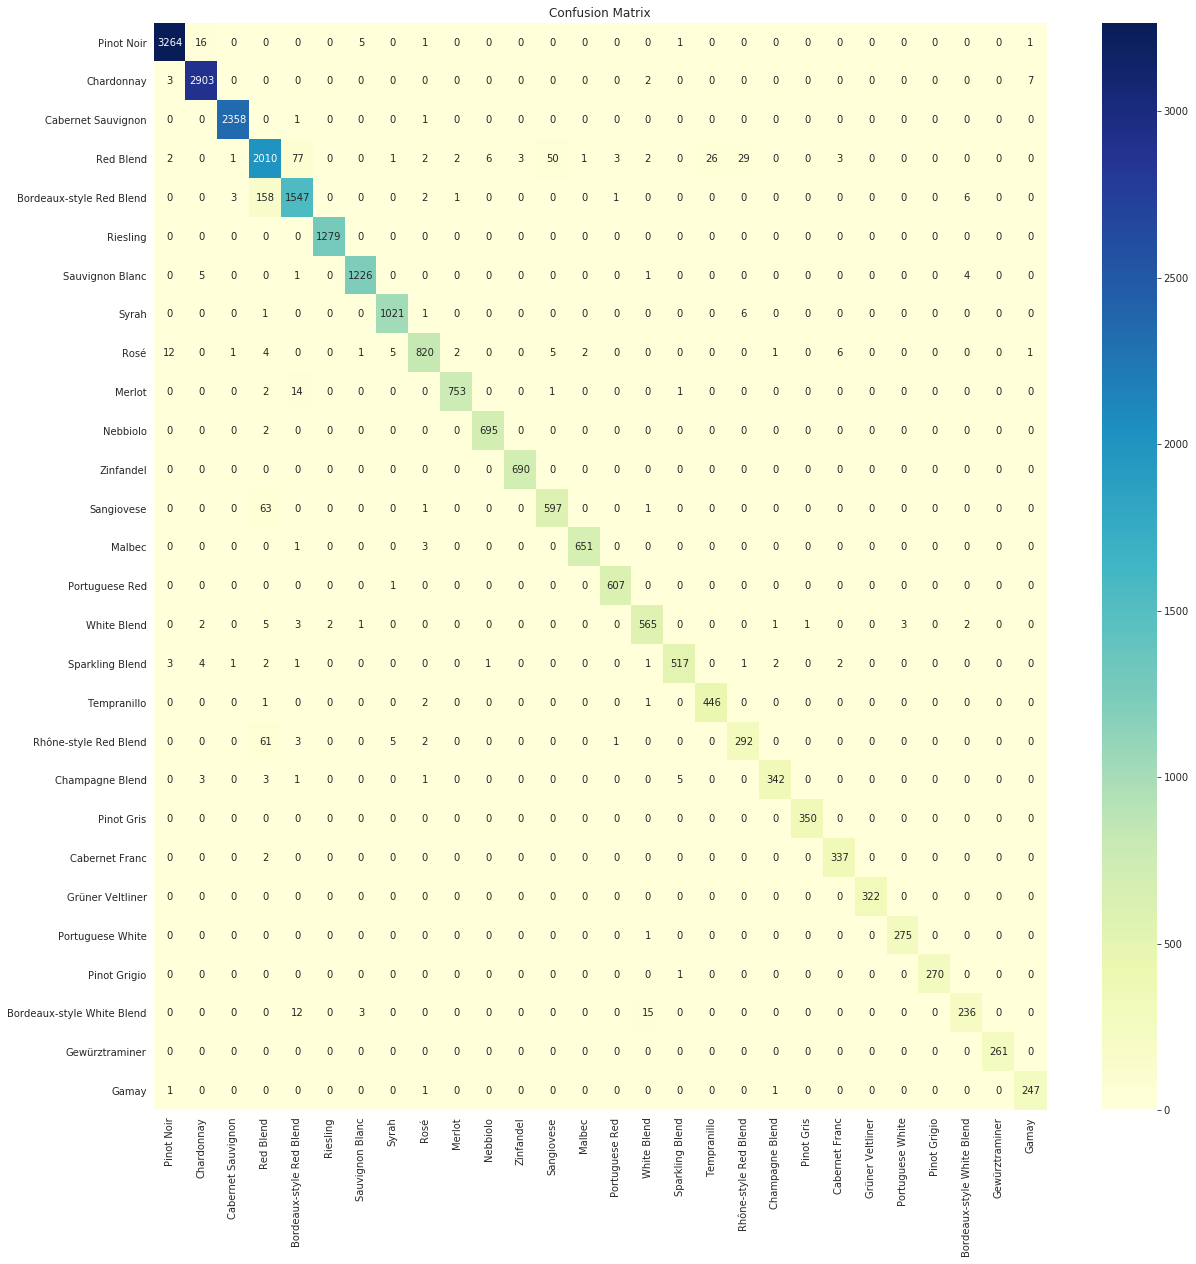

In [62]:
CM = confusion_matrix(y_test, y_test_set2_pred)

plt.figure(figsize=(20, 20))
ax = plt.axes()
sns.heatmap(CM, annot=True, xticklabels=list(target_classes.keys()), yticklabels=list(target_classes.keys()), cmap="YlGnBu", fmt='d', ax = ax)
ax.set_title('Confusion Matrix')
plt.show()

# Detail Report For Test Accuracy

In [63]:
print(classification_report(y_test, y_test_set2_pred, target_names=list(target_classes.keys())))

                            precision    recall  f1-score   support

                Pinot Noir       0.99      0.99      0.99      3288
                Chardonnay       0.99      1.00      0.99      2915
        Cabernet Sauvignon       1.00      1.00      1.00      2360
                 Red Blend       0.87      0.91      0.89      2218
  Bordeaux-style Red Blend       0.93      0.90      0.92      1718
                  Riesling       1.00      1.00      1.00      1279
           Sauvignon Blanc       0.99      0.99      0.99      1237
                     Syrah       0.99      0.99      0.99      1029
                      Rosé       0.98      0.95      0.97       860
                    Merlot       0.99      0.98      0.98       771
                  Nebbiolo       0.99      1.00      0.99       697
                 Zinfandel       1.00      1.00      1.00       690
                Sangiovese       0.91      0.90      0.91       662
                    Malbec       1.00      0.99

# Conclusion

* From above Confusion Matrix and Classification Report the acccuracy of both Set1(i.e, using BoW) & Set2(i.e, using TF-IDF) have near about same accuracy.


* So we can use either BOF or TF-IDF.


* Here, I use both and create CSV.

# # Prepare Data for Final Model (Use All Train Data & Unseen Test Data)

## 1. One Hot Encoding
1. country

In [64]:
# One hot Encoding for country
print("Before Vectorizations")
print('Train Shape : X', X.shape, ', y', y.shape)
print('Test Shape  : X', test_df.shape)

print("="*100)

vectorizer = CountVectorizer(max_features=5000)
vectorizer.fit(X['country'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_country = vectorizer.transform(X['country'].values)
test_country = vectorizer.transform(test_df['country'].values)


print("After Vectorizations")
print('Train Shape : X', train_country.shape, ', y', y.shape)
print('Test Shape  : X', test_country.shape)

print("="*100)
print(vectorizer.get_feature_names())

Before Vectorizations
Train Shape : X (77608, 7) , y (77608,)
Test Shape  : X (20661, 7)
After Vectorizations
Train Shape : X (77608, 38) , y (77608,)
Test Shape  : X (20661, 38)
['argentina', 'australia', 'austria', 'brazil', 'bulgaria', 'canada', 'chile', 'croatia', 'cyprus', 'czech_republic', 'england', 'france', 'georgia', 'germany', 'greece', 'hungary', 'india', 'israel', 'italy', 'lebanon', 'luxembourg', 'macedonia', 'mexico', 'moldova', 'morocco', 'new_zealand', 'peru', 'portugal', 'romania', 'serbia', 'slovenia', 'south_africa', 'spain', 'switzerland', 'turkey', 'ukraine', 'uruguay', 'us']


## 2. Label Encoding
1. province
2. winery

In [65]:
# Label Encoding for province

label_encoder = LabelEncoderExt()
label_encoder.fit(X['province']) # fit has to happen only on train data

# we use the LabelEncoder to convert the categorical data to numerical
train_province = label_encoder.transform(X['province']).reshape(-1,1)
test_province = label_encoder.transform(test_df['province']).reshape(-1,1)

print("After Label Encodeing")
print('Train Shape : X', train_province.shape, ', y', y.shape)
print('Test Shape  : X', test_province.shape)


After Label Encodeing
Train Shape : X (77608, 1) , y (77608,)
Test Shape  : X (20661, 1)


In [66]:
# Label Encoding for winery

label_encoder = LabelEncoderExt()
label_encoder.fit(X['winery']) # fit has to happen only on train data

# we use the LabelEncoder to convert the categorical data to numerical
train_winery = label_encoder.transform(X['winery']).reshape(-1,1)
test_winery = label_encoder.transform(test_df['winery']).reshape(-1,1)

print("After Label Encodeing")
print('Train Shape : X', train_winery.shape, ', y', y.shape)
print('Test Shape  : X', test_winery.shape)


After Label Encodeing
Train Shape : X (77608, 1) , y (77608,)
Test Shape  : X (20661, 1)


## 3. Encoding Numerical Features

1. points
2. price

In [67]:
# Normalize points
normalizer = Normalizer()

normalizer.fit(X['points'].values.reshape(-1,1))

train_points_norm = normalizer.transform(X['points'].values.reshape(-1,1))
test_points_norm = normalizer.transform(test_df['points'].values.reshape(-1,1))


print("After Label Encodeing")
print('Train Shape : X', train_points_norm.shape, ', y', y.shape)
print('Test Shape  : X', test_points_norm.shape)


After Label Encodeing
Train Shape : X (77608, 1) , y (77608,)
Test Shape  : X (20661, 1)


In [68]:
# Normalize price
normalizer = Normalizer()

normalizer.fit(X['price'].values.reshape(-1,1))

train_price_norm = normalizer.transform(X['price'].values.reshape(-1,1))
test_price_norm = normalizer.transform(test_df['price'].values.reshape(-1,1))


print("After Label Encodeing")
print('Train Shape : X', train_price_norm.shape, ', y', y.shape)
print('Test Shape  : X', test_price_norm.shape)


After Label Encodeing
Train Shape : X (77608, 1) , y (77608,)
Test Shape  : X (20661, 1)


## 4. BoW

1. review_title
2. review_description

In [69]:
# Bag of Word for review_title

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X['review_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_review_title_bow = vectorizer.transform(X['review_title'].values)
test_review_title_bow = vectorizer.transform(test_df['review_title'].values)


print("After Vectorizations")
print('Train Shape : X', train_review_title_bow.shape, ', y', y.shape)
print('Test Shape  : X', test_review_title_bow.shape)


After Vectorizations
Train Shape : X (77608, 5000) , y (77608,)
Test Shape  : X (20661, 5000)


In [70]:
# Bag of Word for review_description

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X['review_description'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_review_description_bow = vectorizer.transform(X['review_description'].values)
test_review_description_bow = vectorizer.transform(test_df['review_description'].values)


print("After Vectorizations")
print('Train Shape : X', train_review_description_bow.shape, ', y', y.shape)
print('Test Shape  : X', test_review_description_bow.shape)


After Vectorizations
Train Shape : X (77608, 5000) , y (77608,)
Test Shape  : X (20661, 5000)


## 4. TF-IDF

1. review_title
2. review_description

In [71]:
# TF-IDF of review_title

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)# its a countvectors used for convert text to vectors
vectorizer.fit(X['review_title'].values)# that is learned from trainned data

# we use the fitted CountVectorizer to convert the text to vector
train_review_title_tf = vectorizer.transform(X['review_title'].values)
test_review_title_tf = vectorizer.transform(test_df['review_title'].values)


print("After Vectorizations")
print('Train Shape : X', train_review_title_tf.shape, ', y', y.shape)
print('Test Shape  : X', test_review_title_tf.shape)

After Vectorizations
Train Shape : X (77608, 4752) , y (77608,)
Test Shape  : X (20661, 4752)


In [72]:
# TF-IDF of review_description

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)# its a countvectors used for convert text to vectors
vectorizer.fit(X['review_description'].values)# that is learned from trainned data

# we use the fitted CountVectorizer to convert the text to vector
train_review_description_tf = vectorizer.transform(X['review_description'].values)
test_review_description_tf = vectorizer.transform(test_df['review_description'].values)


print("After Vectorizations")
print('Train Shape : X', train_review_description_tf.shape, ', y', y.shape)
print('Test Shape  : X', test_review_description_tf.shape)

After Vectorizations
Train Shape : X (77608, 7128) , y (77608,)
Test Shape  : X (20661, 7128)


## # Concatinating all the features (BoW)

In [73]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# Train
train_bow = hstack((train_country, train_province, train_winery, train_points_norm, 
               train_price_norm, train_review_title_bow, train_review_description_bow)).tocsr()

# Test
test_bow = hstack((test_country, test_province, test_winery, test_points_norm, 
               test_price_norm, test_review_title_bow, test_review_description_bow)).tocsr()



print("Final Data matrix")
print(train_bow.shape, y.shape)
print(test_bow.shape)

Final Data matrix
(77608, 10042) (77608,)
(20661, 10042)


## # Concatinating all the features (TF-IDF)

In [74]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# Train
train_tfidf = hstack((train_country, train_province, train_winery, train_points_norm, 
               train_price_norm, train_review_title_tf, train_review_description_tf)).tocsr()

# Test
test_tfidf = hstack((test_country, test_province, test_winery, test_points_norm, 
               test_price_norm, test_review_title_tf, test_review_description_tf)).tocsr()



print("Final Data matrix")
print(train_tfidf.shape, y.shape)
print(test_tfidf.shape)

Final Data matrix
(77608, 11922) (77608,)
(20661, 11922)


# Train Model (using BoW)

In [75]:
xgb_bow = XGBClassifier(objective='multi:softmax', n_estimators=100, learning_rate=0.1 )

xgb_bow.fit(train_bow, y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

# Predict (BoW)

In [76]:
test_bow_pred = xgb_bow.predict(test_bow)

# Create Dataframe (BoW)

In [77]:
test_bow_pred_df = pd.DataFrame({'variety': test_bow_pred})

# Convert Numerical Label to Categorical
inv_map_target_dict = dict(zip(target_dict.values(), target_dict.keys()))

test_bow_pred_df = test_bow_pred_df.replace({'variety': inv_map_target_dict})


In [78]:
predicted_test_bow_df = pd.concat([test_df, test_bow_pred_df], axis=1)
predicted_test_bow_df.head()

,country,review_title,review_description,points,price,province,winery,variety
0,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,88,35.0,Oregon,Boedecker Cellars,Pinot Noir
1,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",90,60.0,Mendoza Province,Mendoza Vineyards,Malbec
2,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",87,38.0,California,Prime,Chardonnay
3,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",91,20.0,Mendoza Province,Bodega Cuarto Dominio,Malbec
4,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",90,49.0,Tuscany,SassodiSole,Sangiovese


# Make CSV (BoW)

In [79]:
predicted_test_bow_df.to_csv('predicted_test_bow.csv', index=False)

# Train Model (using TF-IDF)

In [80]:
xgb_tfidf = XGBClassifier(objective='multi:softmax', n_estimators=150, learning_rate=0.1 )

xgb_tfidf.fit(train_tfidf, y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

# Predict (TF-IDF)

In [81]:
test_tfidf_pred = xgb_tfidf.predict(test_tfidf)

# Create Dataframe (TF-IDF)

In [82]:
test_tfidf_pred_df = pd.DataFrame({'variety': test_bow_pred})

# Convert Numerical Label to Categorical
inv_map_target_dict = dict(zip(target_dict.values(), target_dict.keys()))

test_tfidf_pred_df = test_tfidf_pred_df.replace({'variety': inv_map_target_dict})


In [83]:
predicted_test_tfidf_df = pd.concat([test_df, test_tfidf_pred_df], axis=1)
predicted_test_tfidf_df

,country,review_title,review_description,points,price,province,winery,variety
0,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,88,35.0,Oregon,Boedecker Cellars,Pinot Noir
1,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",90,60.0,Mendoza Province,Mendoza Vineyards,Malbec
2,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",87,38.0,California,Prime,Chardonnay
3,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",91,20.0,Mendoza Province,Bodega Cuarto Dominio,Malbec
4,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",90,49.0,Tuscany,SassodiSole,Sangiovese
...,...,...,...,...,...,...,...,...
20656,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",91,34.0,California,Yorkville Cellars,Cabernet Franc
20657,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,84,20.0,Languedoc-Roussillon,Château Ribaute,Rosé
20658,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",94,85.0,California,Daou,Cabernet Sauvignon
20659,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,80,9.0,Northern Spain,Peñascal,Rosé


# Make CSV (TF-IDF)

In [84]:
predicted_test_tfidf_df.to_csv('predicted_test_tfidf.csv', index=False)

# *** Observations ***


1. The data is complicated.


2. The data have lots of missed values which affectes on predicion accuracy.


3. So the data need to proper imputation. So I apply folloing Imputation,

    * The feature 'price' have 5281 NaN values.
    * So I fill the most frequent prices of apropreate countries instade of NaN values in 'price'.
    
    
4. The data have the most categorical values so based on these type of data I decide to use the XGBClassifier     because XGBClassifier doesn't based on distance algorithm.